In [212]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

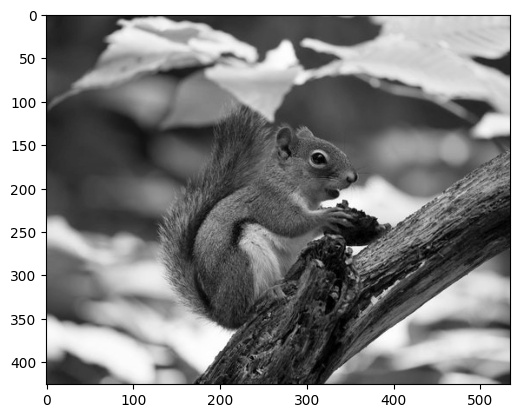

In [213]:
img = cv.imread(r"c:\Users\Ale Escallada\OneDrive\Documentos\imagenesPI2\squirrel_cls.jpg", 0)
plt.imshow(img, "gray")

In [214]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

True

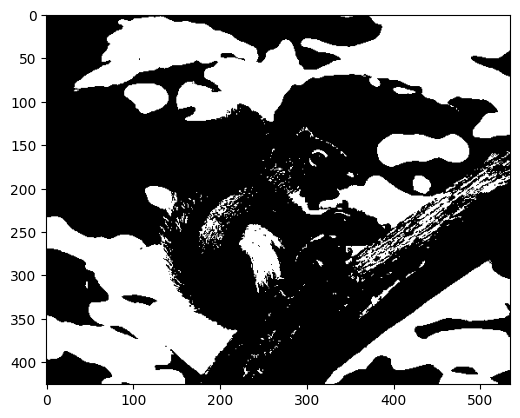

In [215]:
#Binarizar imagen
img_bin = cv.threshold(img, 128, 255, cv.THRESH_BINARY)[1]
plt.imshow(img_bin, "gray")
cv.imwrite("img_bin.jpg", img_bin)

In [216]:
np.unique(img_bin)

array([  0, 255], dtype=uint8)

## Erosión

In [217]:
kernel = np.ones((3,3), dtype=np.uint8)
kernel2 = np.ones((5,5), dtype=np.uint8)

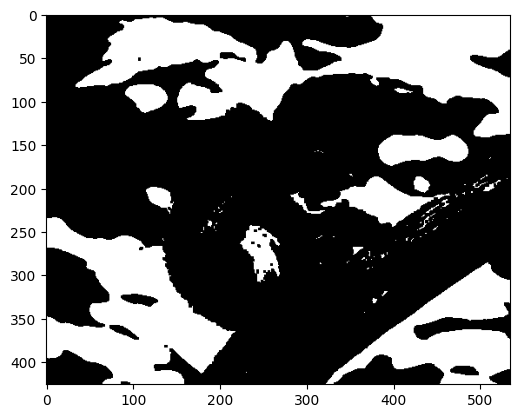

In [218]:
plt.imshow(cv.erode(img_bin, kernel=kernel), "gray")

In [219]:
erosion = cv.erode(img_bin, kernel=kernel)
cv.imwrite("erosion.jpg", erosion)

True

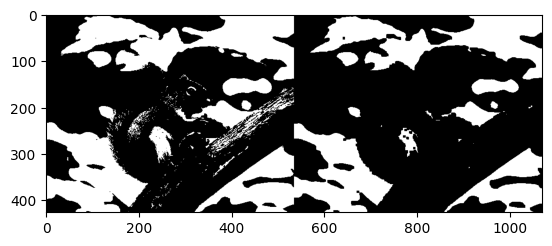

In [220]:
#EROSIÓN: Quitar información. Todo lo blanco lo modifica, y lo que está negro se queda igual
plt.imshow(np.hstack((img_bin, cv.erode(img_bin, kernel=kernel, iterations=2))), "gray")


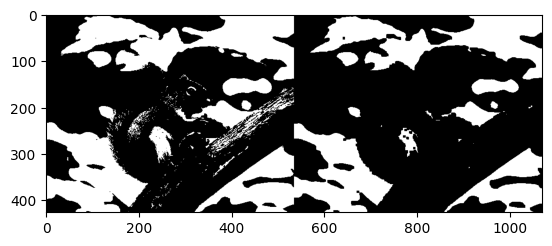

In [221]:
plt.imshow(np.hstack((img_bin, cv.erode(img_bin, kernel=kernel2))), "gray")

In [222]:
erosion2 = cv.erode(img_bin, kernel=kernel2)
cv.imwrite("erosion2.jpg", erosion2)

True

## Dilatación

Dilatación aumenta la imagen

True

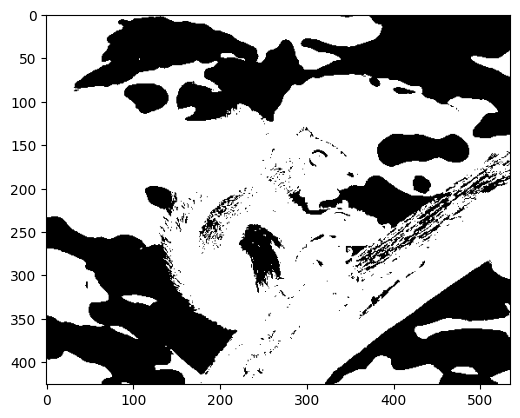

In [223]:
# Binarizar inversamente
img_bin_inv = cv.threshold(img, 128, 255, cv.THRESH_BINARY_INV)[1]
plt.imshow(img_bin_inv, "gray")
cv.imwrite("img_bin_inv.jpg", img_bin_inv)

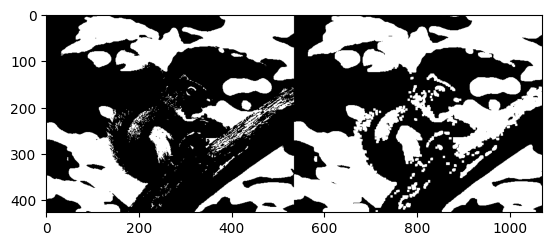

In [224]:
plt.imshow(np.hstack((img_bin, cv.dilate(img_bin, kernel=kernel, iterations=2))), "gray")

In [225]:
dilatado = cv.dilate(img_bin, kernel=kernel, iterations=2)
cv.imwrite("dilatado.jpg", dilatado)

True

## Apertura

Primero quita el ruido, y después erosiona para regresar a la imagen original

True

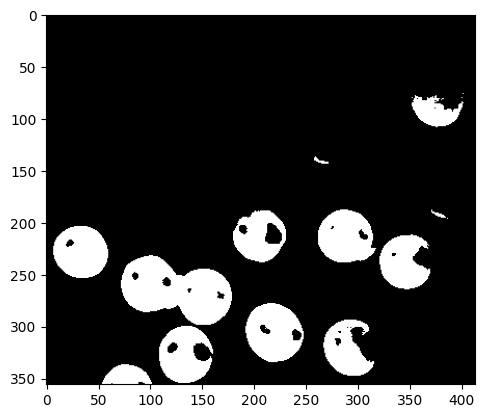

In [243]:
smarties = cv.imread(r"c:\Users\Ale Escallada\OneDrive\Documentos\imagenesPI2\smarties.png", 0)
smarties_bin = cv.threshold(smarties, 128, 255, cv.THRESH_BINARY_INV)[1]
plt.imshow(smarties_bin, "gray")
cv.imwrite("smarties_bin.jpg", smarties_bin)

True

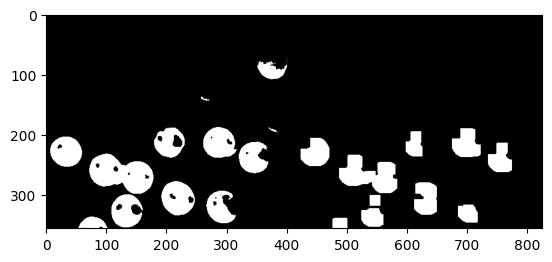

In [260]:
plt.imshow(np.hstack((smarties_bin, cv.morphologyEx(smarties_bin, cv.MORPH_OPEN, kernel, iterations=8))), "gray")
morph = cv.morphologyEx(smarties_bin, cv.MORPH_OPEN, kernel, iterations=8)
cv.imwrite("morph.jpg", morph)

## Cierre

Primero hace una dilatación para cerrar huecos (hace grande el plano), y con close mantiene la imagen en su tamaño

True

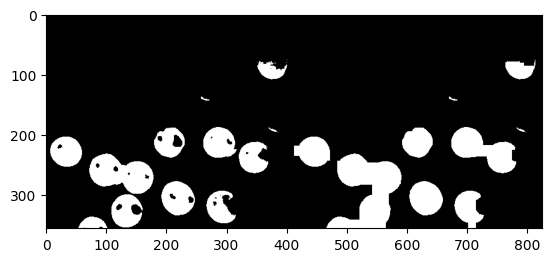

In [261]:
plt.imshow(np.hstack((smarties_bin, cv.morphologyEx(smarties_bin, cv.MORPH_CLOSE, kernel, iterations=8))), "gray")
cierre = cv.morphologyEx(smarties_bin, cv.MORPH_CLOSE, kernel, iterations=8)
cv.imwrite("cierre.jpg", cierre)

## Gradiente

Diferencia entre dilatación y erosión

True

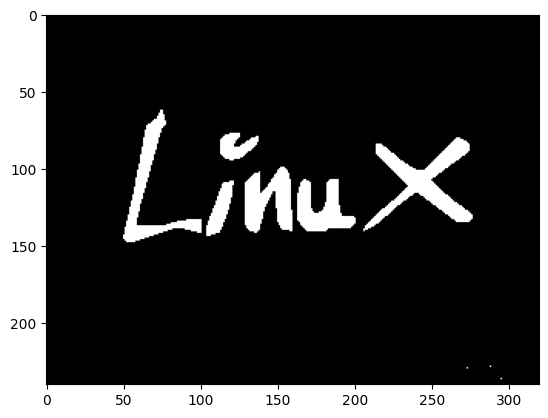

In [262]:
logo = cv.imread(r"c:\Users\Ale Escallada\OneDrive\Documentos\imagenesPI2\LinuxLogo.jpg", 0)
logo_bin = cv.threshold(logo, 128, 255, cv.THRESH_BINARY)[1]
plt.imshow(logo_bin, "gray")
cv.imwrite("logo_bin.jpg", logo_bin)

True

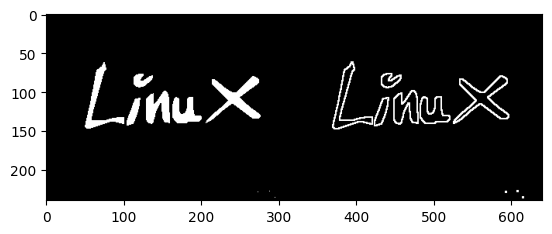

In [263]:
plt.imshow(np.hstack((logo_bin, cv.morphologyEx(logo_bin, cv.MORPH_GRADIENT, kernel, iterations=1))), "gray")
gradiente = cv.morphologyEx(logo_bin, cv.MORPH_GRADIENT, kernel, iterations=1)
cv.imwrite("gradiente.jpg", gradiente)

In [248]:
logo_dilatado = cv.dilate(logo_bin, kernel)
logo_erosionado = cv.erode(logo_bin, kernel)

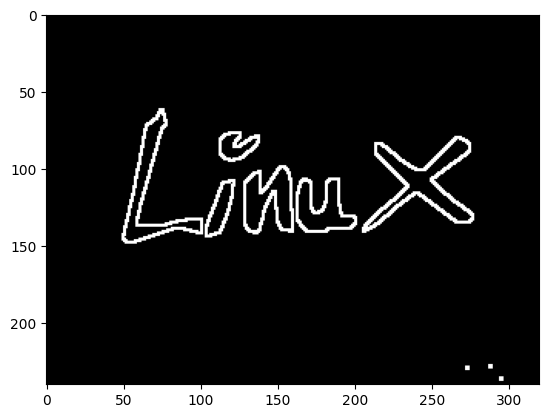

In [249]:
plt.imshow(logo_dilatado - logo_erosionado, "gray")

## Kernels

In [250]:
# Kernel rectangular
kernel_rect = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
# Kernel elíptico
kernel_elip = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
# Kerneñ cruzado
kernel_cruz = cv.getStructuringElement(cv.MORPH_CROSS, (5,5))

### Erosionar

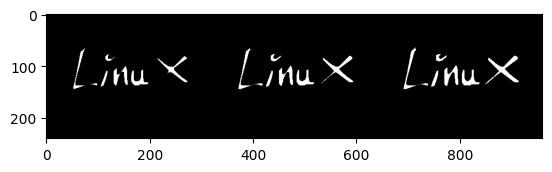

In [251]:
# Erosionar con kernels rectangular, elíptico y cruzado
plt.imshow(np.hstack((cv.erode(logo_bin, kernel=kernel_rect), cv.erode(logo_bin, kernel=kernel_elip), cv.erode(logo_bin, kernel=kernel_cruz))), "gray")

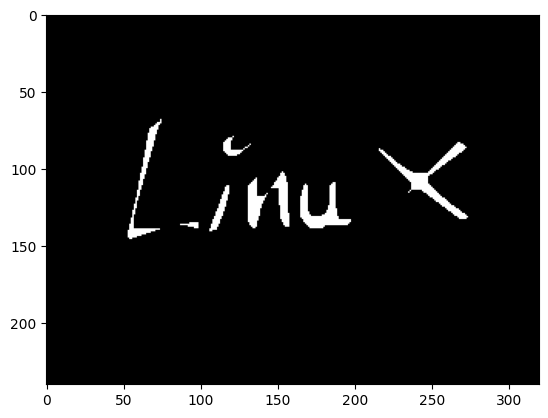

In [252]:
plt.imshow(cv.erode(logo_bin, kernel=kernel_rect), "gray")

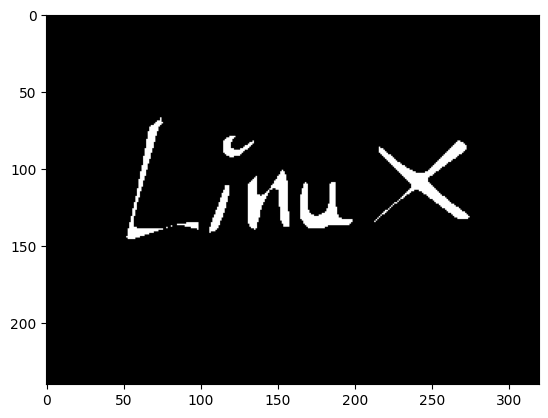

In [253]:
plt.imshow(cv.erode(logo_bin, kernel=kernel_elip), "gray")

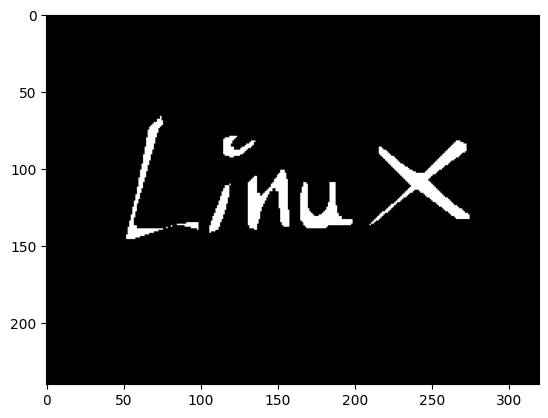

In [254]:
plt.imshow(cv.erode(logo_bin, kernel=kernel_cruz), "gray")

### Dilatar

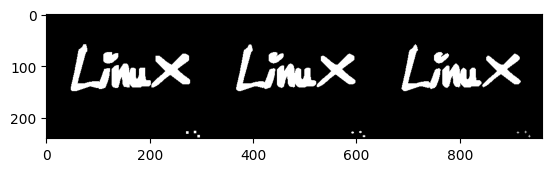

In [255]:
# Dilatar con kernels rectangular, elíptico y cruzado
plt.imshow(np.hstack((cv.dilate(logo_bin, kernel=kernel_rect), cv.dilate(logo_bin, kernel=kernel_elip), cv.dilate(logo_bin, kernel=kernel_cruz))), "gray")

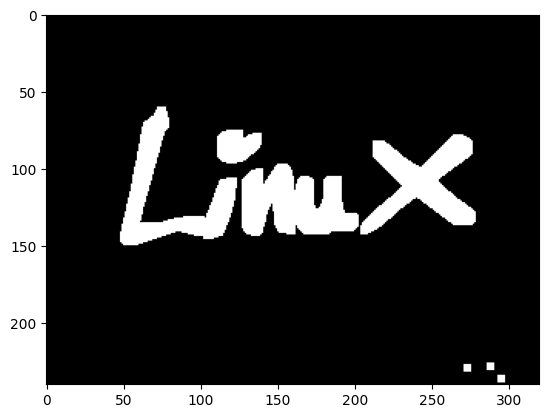

In [256]:
plt.imshow(cv.dilate(logo_bin, kernel=kernel_rect), "gray")

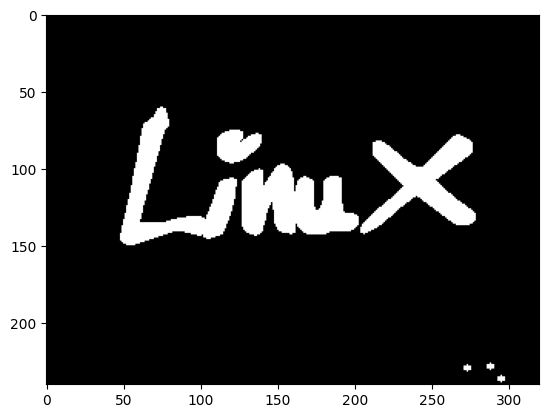

In [257]:
plt.imshow(cv.dilate(logo_bin, kernel=kernel_elip), "gray")

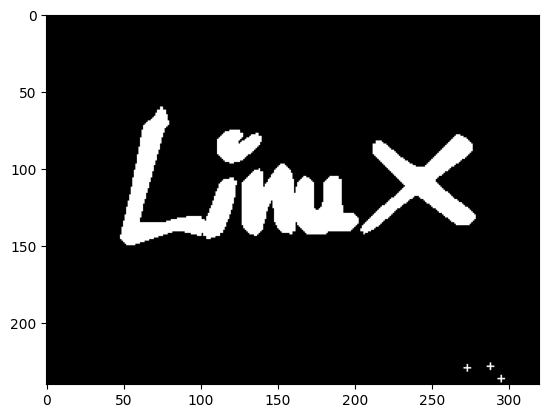

In [258]:
plt.imshow(cv.dilate(logo_bin, kernel=kernel_cruz), "gray")

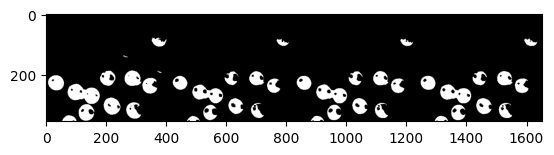

In [259]:
# Erosionar con kernels rectangular, elíptico y cruzado
plt.imshow(np.hstack((smarties_bin, cv.erode(smarties_bin, kernel=kernel_rect), cv.erode(smarties_bin, kernel=kernel_elip), cv.erode(smarties_bin, kernel=kernel_cruz))), "gray")